In [1]:
# Install a pip package in the current Jupyter kernel - https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
import sys
!{sys.executable} -m pip install matplotlib numpy
sys.path.append('.')
import plotUtil


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


Plot score std over evorun iterations.

In [57]:
import json
#json_file_path = '/Users/bthj/QD/conf-duration_delta_pitch_combinations/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_thrshld_0.5_1685965690117.json'
# json_file_path = '/Users/bthj/QD/conf-static_mutation_rate_combinations/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_thrshld_0.5_1685965696416.json'
json_file_path = '/Users/bjornpjo/Developer/apps/kromosynth-cli/cli-app/conf/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_1693487991208.json'
x_multiplier = 1000  # Set this value as the step size in the JSON file name
title = "scoreVariances: " + json_file_path.split('/')[4]

# Read data from JSON file
data = plotUtil.read_data_from_json(json_file_path)

Score stats means across all scores for one evorun iteration.

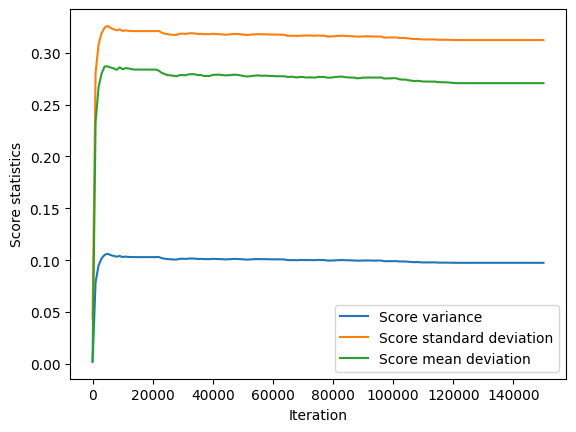

In [39]:
# populate the array scoreStandardDeviation with entries from the JSON file at evoRuns[0].iterations[0].scoreVariances[i].scoreStandardDeviation
scoreVariance = []
scoreStandardDeviation = []
scoreMeanDeviation = []
for i in range(len(data['evoRuns'][0]['iterations'][0]['scoreVariances'])):
    scoreVariance.append(data['evoRuns'][0]['iterations'][0]['scoreVariances'][i]['scoreVarianceAtIteration']['scoreVariance'])
    scoreStandardDeviation.append(data['evoRuns'][0]['iterations'][0]['scoreVariances'][i]['scoreVarianceAtIteration']['scoreStandardDeviation'])
    scoreMeanDeviation.append(data['evoRuns'][0]['iterations'][0]['scoreVariances'][i]['scoreVarianceAtIteration']['scoreMeanDeviation'])

# plot scoreStandardDeviation
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(len(scoreVariance)) * x_multiplier, scoreVariance, label='Score variance')
plt.plot(np.arange(len(scoreStandardDeviation)) * x_multiplier, scoreStandardDeviation, label='Score standard deviation')
plt.plot(np.arange(len(scoreMeanDeviation)) * x_multiplier, scoreMeanDeviation, label='Score mean deviation')

plt.ylabel('Score statistics')
plt.xlabel('Iteration')
plt.legend()
plt.show()



**For all evoruns**: Plot score std over evorun iterations.

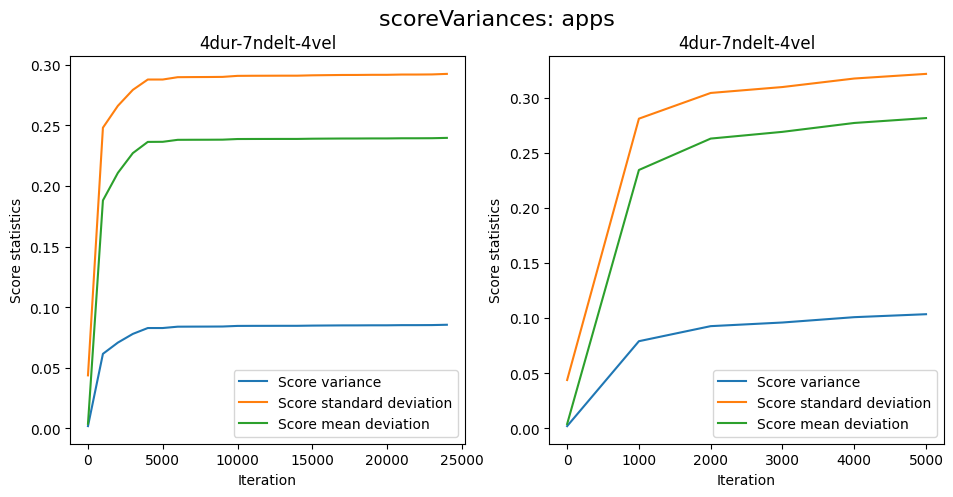

In [60]:
score_variance_arrays = plotUtil.extract_data_arrays(data, 'scoreVariances')

def plotScoreVariances(plt, ax, x_values, array, arrayLabel):

    if len(arrayLabel) > 50:
        arrayLabel = arrayLabel[:50] + '\n' + arrayLabel[50:]
        plt.subplots_adjust(hspace=0.4)
        # add space for the second line of the title
        plt.subplots_adjust(top=0.96)

    scoreVariance = []
    scoreStandardDeviation = []
    scoreMeanDeviation = []
    for i in range(len(array)):
        scoreVariance.append(array[i]['scoreVarianceAtIteration']['scoreVariance'])
        scoreStandardDeviation.append(array[i]['scoreVarianceAtIteration']['scoreStandardDeviation'])
        scoreMeanDeviation.append(array[i]['scoreVarianceAtIteration']['scoreMeanDeviation'])
    ax.plot(x_values, scoreVariance, label='Score variance')
    ax.plot(x_values, scoreStandardDeviation, label='Score standard deviation')
    ax.plot(x_values, scoreMeanDeviation, label='Score mean deviation')
    ax.set_ylabel('Score statistics')
    ax.set_xlabel('Iteration')
    ax.set_title(arrayLabel)
    ax.legend()

plotUtil.render_graphs(score_variance_arrays, x_multiplier, plotScoreVariances, 10, 5, title, 100)

Score stats taken independently for each genome, and then averaged; e.g. std of scores for each genome.

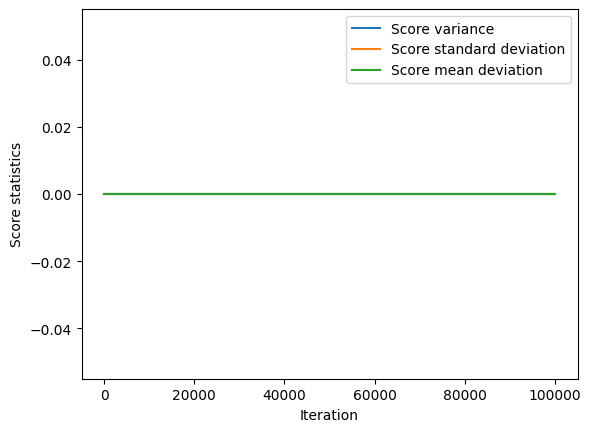

In [35]:
averageGenomeScoreVariance = []
averageGenomeScoreStandardDeviation = []
averageGenomeScoreMeanDeviation = []
for i in range(len(data['evoRuns'][0]['iterations'][0]['scoreVariances'])):
    averageGenomeScoreVariance.append(data['evoRuns'][0]['iterations'][0]['scoreVariances'][i]['scoreVarianceForElitesAtIteration']['averageGenomeScoreVariance'])
    averageGenomeScoreStandardDeviation.append(data['evoRuns'][0]['iterations'][0]['scoreVariances'][i]['scoreVarianceForElitesAtIteration']['averageGenomeScoreStandardDeviation'])
    averageGenomeScoreMeanDeviation.append(data['evoRuns'][0]['iterations'][0]['scoreVariances'][i]['scoreVarianceForElitesAtIteration']['averageGenomeScoreMeanDeviation'])

# plot scoreStandardDeviation
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(len(averageGenomeScoreVariance)) * x_multiplier, averageGenomeScoreVariance, label='Score variance')
plt.plot(np.arange(len(averageGenomeScoreStandardDeviation)) * x_multiplier, averageGenomeScoreStandardDeviation, label='Score standard deviation')
plt.plot(np.arange(len(averageGenomeScoreMeanDeviation)) * x_multiplier, averageGenomeScoreMeanDeviation, label='Score mean deviation')

plt.ylabel('Score statistics')
plt.xlabel('Iteration')
plt.legend()
plt.show()

**For all evoruns**: Plot score stats taken independently for each genome, and then averaged; e.g. std of scores for each genome.

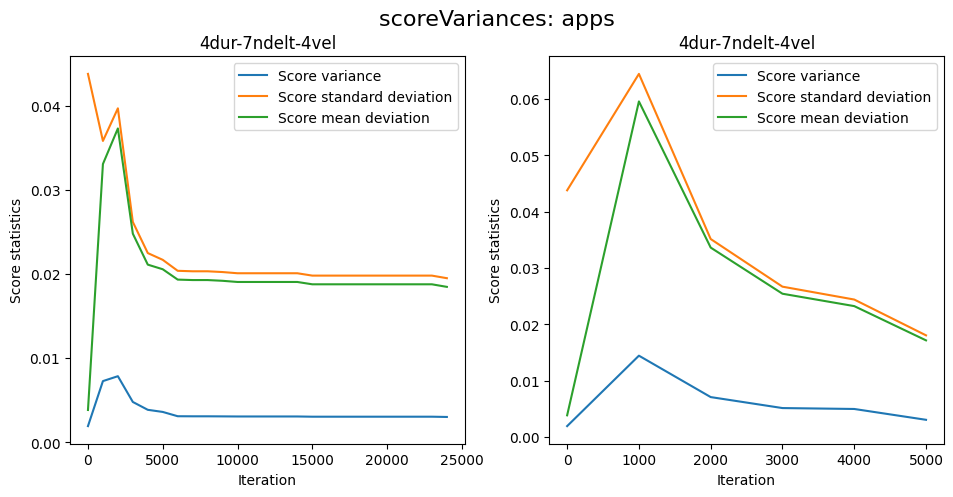

In [62]:
def plotScoreVariancesForElites(plt, ax, x_values, array, arrayLabel):

    if len(arrayLabel) > 50:
        arrayLabel = arrayLabel[:50] + '\n' + arrayLabel[50:]
        plt.subplots_adjust(hspace=0.4)
        # add space for the second line of the title
        plt.subplots_adjust(top=0.96)

    averageGenomeScoreVariance = []
    averageGenomeScoreStandardDeviation = []
    averageGenomeScoreMeanDeviation = []
    for i in range(len(array)):
        averageGenomeScoreVariance.append(array[i]['scoreVarianceForElitesAtIteration']['averageGenomeScoreVariance'])
        averageGenomeScoreStandardDeviation.append(array[i]['scoreVarianceForElitesAtIteration']['averageGenomeScoreStandardDeviation'])
        averageGenomeScoreMeanDeviation.append(array[i]['scoreVarianceForElitesAtIteration']['averageGenomeScoreMeanDeviation'])
    ax.plot(x_values, averageGenomeScoreVariance, label='Score variance')
    ax.plot(x_values, averageGenomeScoreStandardDeviation, label='Score standard deviation')
    ax.plot(x_values, averageGenomeScoreMeanDeviation, label='Score mean deviation')
    ax.set_ylabel('Score statistics')
    ax.set_xlabel('Iteration')
    ax.set_title(arrayLabel)
    ax.legend()

plotUtil.render_graphs(score_variance_arrays, x_multiplier, plotScoreVariancesForElites, 10, 5, title, 100)